In [1]:
import pandas as pd

In [66]:
import matplotlib.pyplot as plt

In [67]:
import seaborn as sns

In [7]:
df09 = pd.read_csv('C:/Users/mehedia/Google Drive/VA-Index/Resilience/BP_2009_00A3_with_ann.csv', skiprows=[1])

In [9]:
df15 = pd.read_csv('C:/Users/mehedia/Google Drive/VA-Index/Resilience/BP_2015_00A3_with_ann.csv', skiprows=[1])

In [11]:
df09.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'NAICS.id',
       'NAICS.display-label', 'EMPSZES.id', 'EMPSZES.display-label', 'YEAR.id',
       'ESTAB', 'EMP', 'EMP_N', 'PAYQTR1', 'PAYQTR1_N', 'PAYANN', 'PAYANN_N'],
      dtype='object')

In [32]:
df15.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'NAICS.id',
       'NAICS.display-label', 'EMPSZES.id', 'EMPSZES.display-label', 'YEAR.id',
       'ESTAB', 'EMP', 'PAYQTR1', 'PAYANN'],
      dtype='object')

In [25]:
df09_1 = df09[df09['NAICS.id'] == '00'][df09['EMPSZES.id'] == 1]

C:\Users\mehedia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [87]:
df09_1[df09_1.EMP.str.contains('[g|N]')]

,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,EMPSZES.id,EMPSZES.display-label,YEAR.id,ESTAB,EMP,EMP_N,PAYQTR1,PAYQTR1_N,PAYANN,PAYANN_N
16930,0500000US51181,51181,"Surry County, Virginia",00,Total for all sectors,1,All establishments,2009,81,g,D,D,D,D,D


In [80]:
df09_1.EMP = df09_1.EMP.astype('int')

ValueError: invalid literal for int() with base 10: 'g'

In [26]:
df15_1 = df15[df15['NAICS.id'] == '00'][df15['EMPSZES.id'] == 1]

C:\Users\mehedia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [39]:
df09_2 = df09_1[['GEO.id2', 'ESTAB']]

In [41]:
df15_2 = df15_1[['GEO.id2', 'ESTAB']]

In [56]:
joined = df15_2.merge(df09_2, how='left', on='GEO.id2', suffixes=['15', '09'])

In [45]:
df09_2[:3]

,GEO.id2,ESTAB
0,51000,165
150,51001,818
360,51003,2486


In [46]:
df15_2[:3]

,GEO.id2,ESTAB
0,51001,738
190,51003,2660
400,51005,242


In [57]:
joined[:10]

,GEO.id2,ESTAB15,ESTAB09
0,51001,738,818
1,51003,2660,2486
2,51005,242,250
3,51007,272,295
4,51009,572,618
5,51011,288,297
6,51013,6307,5856
7,51015,1409,1388
8,51017,125,137
9,51019,1376,1413


In [59]:
joined['growth'] = (joined['ESTAB15'] - joined['ESTAB09'])/joined['ESTAB09']

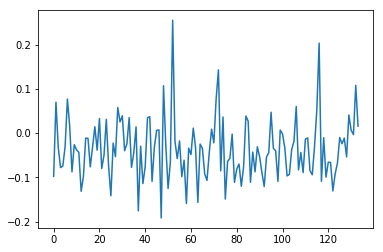

In [68]:
joined.growth.plot()

In [64]:
# joined.to_csv('resilience.csv')

In [70]:
joined.growth.mean()

-0.036027175705152355

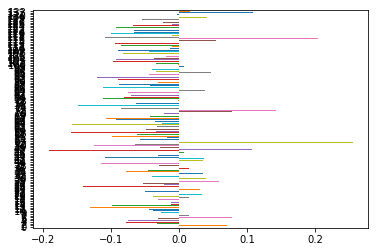

In [72]:
joined.growth.plot(kind='barh')